In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Bond data must be looked at as a percentage of GDP
nominal_gdp = pd.read_csv(r"C:\\Users\\gusta\\GitHub\\Data501_Project\\Economy\\2023_Nominal_GDP_By_Country.csv")
bonds = pd.read_csv(r"C:\\Users\\gusta\\GitHub\\Data501_Project\\Bonds\\Sustainable_Bonds_By_Country.csv")

In [18]:
# Rename Britain to United Kingdom in the bonds dataframe
# Czech to Czechia in bonds
# Czech Republic to Czechia in nominal_gdp 
bonds.replace({
    "Britain":"United Kingdom",
    "Czech": "Czechia",
    "Slovakia": "Slovak Republic"
}, inplace=True)

nominal_gdp.replace({"Czech Republic": "Czechia"}, inplace=True)

In [19]:
# Recall that the nominal_gdp data is in billions, and the bonds are to the dollar
nominal_bonds = nominal_gdp.merge(bonds, left_on="Country", right_on="Country/Region (Full Name)", how="left")

In [20]:
nominal_bonds = nominal_bonds.iloc[:, [0, 1, 3, 4]]

In [21]:
nominal_bonds.fillna(0, inplace=True)

In [22]:
nominal_bonds

,Country,Nominal 2023 GDP (EUR Billions),Amt Issued (EUR) Labelled,Amt Issued (EUR) Unlabelled
0,Albania,21.880400,0.000000e+00,0.000000e+00
1,Austria,499.872900,1.228665e+10,1.647960e+10
2,Belarus,65.420800,0.000000e+00,0.000000e+00
3,Belgium,596.135450,1.843000e+10,1.477032e+10
4,Bosnia and Herzegovina,25.597750,0.000000e+00,0.000000e+00
5,Bulgaria,97.944050,0.000000e+00,0.000000e+00
6,Croatia,76.175750,3.994882e+08,0.000000e+00
7,Czechia,318.480850,1.438108e+09,9.383785e+08
8,Denmark,399.760000,6.476152e+09,2.566511e+10
9,Estonia,39.709050,0.000000e+00,0.000000e+00


In [23]:
nominal_bonds["Labelled_Sustainable_Bonds_per_GDP"] = \
    (nominal_bonds['Amt Issued (EUR) Labelled']*10**-9)/nominal_bonds['Nominal 2023 GDP (EUR Billions)']

nominal_bonds["Unlabelled_Sustainable_Bonds_per_GDP"] = \
    (nominal_bonds['Amt Issued (EUR) Unlabelled']*10**-9)/nominal_bonds['Nominal 2023 GDP (EUR Billions)']

In [24]:
vars = ['Country', 'Labelled_Sustainable_Bonds_per_GDP', 'Unlabelled_Sustainable_Bonds_per_GDP']
nominal_bonds[vars].to_csv("Europe_Green_Bonds_Percentage_of_GDP.csv", index=False)

In [29]:
bonds_per_gdp = nominal_bonds[vars].copy()

In [58]:
bonds_per_gdp['Total_Sustainable_Bonds_per_GDP'] = \
    bonds_per_gdp['Labelled_Sustainable_Bonds_per_GDP'] + bonds_per_gdp['Unlabelled_Sustainable_Bonds_per_GDP']

bonds_per_gdp.sort_values(by='Total_Sustainable_Bonds_per_GDP', inplace=True)

In [59]:
bonds_per_gdp

,Country,Labelled_Sustainable_Bonds_per_GDP,Unlabelled_Sustainable_Bonds_per_GDP,Total_Sustainable_Bonds_per_GDP
0,Albania,0.000000,0.000000,0.000000
9,Estonia,0.000000,0.000000,0.000000
28,North Macedonia,0.000000,0.000000,0.000000
26,Montenegro,0.000000,0.000000,0.000000
34,San Marino,0.000000,0.000000,0.000000
19,Kosovo,0.000000,0.000000,0.000000
25,Moldova,0.000000,0.000000,0.000000
2,Belarus,0.000000,0.000000,0.000000
4,Bosnia and Herzegovina,0.000000,0.000000,0.000000
5,Bulgaria,0.000000,0.000000,0.000000


In [102]:
bonds_per_gdp.sort_values(by='Total_Sustainable_Bonds_per_GDP', ascending=False, inplace=True)

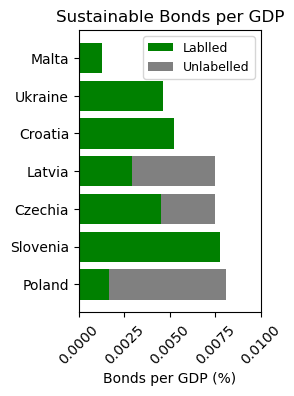

In [94]:
bonds_per_gdp_filtered = bonds_per_gdp[
    (bonds_per_gdp['Total_Sustainable_Bonds_per_GDP'] > 0.001) & 
    (bonds_per_gdp['Total_Sustainable_Bonds_per_GDP'] < 0.01)
]

# Re-calculate the number of countries and their positions
n = len(bonds_per_gdp_filtered)
ind = np.arange(n)

fig, ax = plt.subplots(figsize=(3, 4))

# Plotting the labelled bonds
labelled_bars = ax.barh(ind, bonds_per_gdp_filtered['Labelled_Sustainable_Bonds_per_GDP'], color='green', label='Labelled Sustainable Bonds')

# Plotting the unlabelled bonds on top of labelled bonds
unlabelled_bars = ax.barh(ind, bonds_per_gdp_filtered['Unlabelled_Sustainable_Bonds_per_GDP'], left=bonds_per_gdp_filtered['Labelled_Sustainable_Bonds_per_GDP'], color='grey', label='Unlabelled Sustainable Bonds')


ax.set_xlabel('Bonds per GDP (%)')
ax.set_title('Sustainable Bonds per GDP')
ax.set_xlim(0, 0.01)

ax.tick_params(axis='x', rotation=45)
ax.set_yticks(ind)
ax.set_yticklabels(bonds_per_gdp_filtered['Country'])
ax.legend(['Lablled', 'Unlabelled'], fontsize=9)

plt.tight_layout()
plt.show()

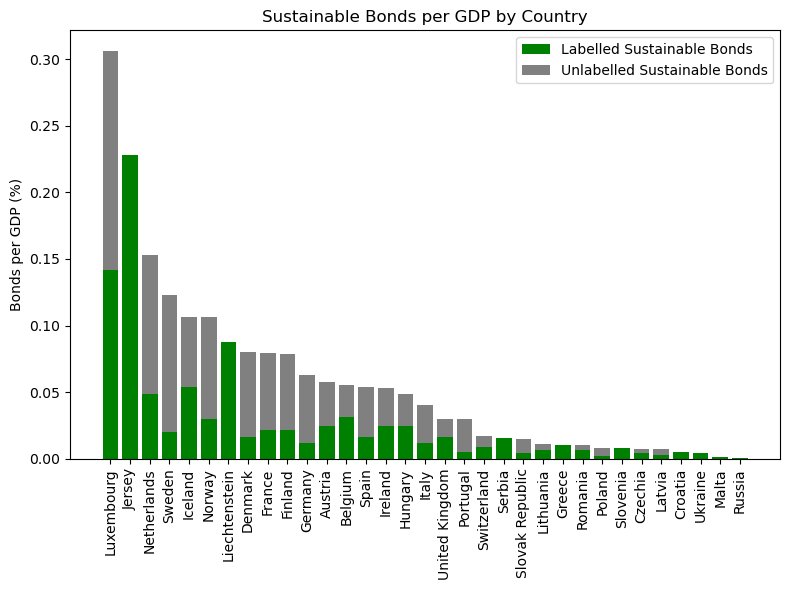

In [103]:
bonds_per_gdp_filtered = bonds_per_gdp[bonds_per_gdp['Total_Sustainable_Bonds_per_GDP'] > 0]

n = len(bonds_per_gdp_filtered)
ind = np.arange(n)  # The x locations for the groups

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the labelled bonds
labelled_bars = ax.bar(ind, bonds_per_gdp_filtered['Labelled_Sustainable_Bonds_per_GDP'], color='green', label='Labelled Sustainable Bonds')

# Plotting the unlabelled bonds on top of the labelled bonds
# For a stacked bar in a vertical bar graph, we add the heights of the first set to the bottom of the second
unlabelled_bars = ax.bar(ind, bonds_per_gdp_filtered['Unlabelled_Sustainable_Bonds_per_GDP'], bottom=bonds_per_gdp_filtered['Labelled_Sustainable_Bonds_per_GDP'], color='grey', label='Unlabelled Sustainable Bonds')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Bonds per GDP (%)')
ax.set_title('Sustainable Bonds per GDP by Country')
ax.set_xticks(ind)
ax.set_xticklabels(bonds_per_gdp_filtered['Country'], rotation=90)  # Rotate x-axis labels for better readability
ax.legend()

plt.tight_layout()
plt.show()